In [8]:
# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [9]:
# ========================
# 2. Load and Merge Data
# ========================

#nifty_data = pd.read_csv("NIFTY.csv")
#indiavix_data = pd.read_csv("INDIAVIX.csv")

nifty_data = pd.read_csv("data/NIFTY 50-9-08-2024-to-9-08-2025.csv")
indiavix_data = pd.read_csv("data/hist_india_vix_-9-08-2024-to-9-08-2025.csv")

# Standardize column names
nifty_data.columns = nifty_data.columns.str.strip()
indiavix_data.columns = indiavix_data.columns.str.strip()



In [10]:
print("Nifty Data Info:")
print(nifty_data.info())
print(nifty_data.describe())


Nifty Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             250 non-null    object 
 1   Open             250 non-null    float64
 2   High             250 non-null    float64
 3   Low              250 non-null    float64
 4   Close            250 non-null    float64
 5   Shares Traded    250 non-null    int64  
 6   Turnover (₹ Cr)  250 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB
None
               Open          High          Low        Close  Shares Traded  \
count    250.000000    250.000000    250.00000    250.00000   2.500000e+02   
mean   24266.140800  24379.063000  24139.28360  24257.99000   3.121574e+08   
std      927.311391    914.321341    931.57625    920.71166   1.004432e+08   
min    21758.400000  22105.050000  21743.65000  22082.65000   3.881139e+07   
25%    

In [11]:

print("\nINDIAVIX Data Info:")
print(indiavix_data.info())
print(indiavix_data.describe())



INDIAVIX Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         250 non-null    object 
 1   Open         250 non-null    float64
 2   High         250 non-null    float64
 3   Low          250 non-null    float64
 4   Close        250 non-null    float64
 5   Prev. Close  250 non-null    float64
 6   Change       250 non-null    float64
 7   % Change     250 non-null    float64
dtypes: float64(7), object(1)
memory usage: 15.8+ KB
None
             Open        High         Low       Close  Prev. Close  \
count  250.000000  250.000000  250.000000  250.000000   250.000000   
mean    14.551660   15.216610   13.614990   14.533940    14.551660   
std      2.035603    2.237201    1.942122    2.037669     2.035603   
min     10.515000   10.752500    8.980000   10.520000    10.515000   
25%     13.313750   13.918125   12.397500   13.

In [12]:
print("Nifty Missing Values:")
print(nifty_data.isnull().sum())

print("\nINDIAVIX Missing Values:")
print(indiavix_data.isnull().sum())


Nifty Missing Values:
Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

INDIAVIX Missing Values:
Date           0
Open           0
High           0
Low            0
Close          0
Prev. Close    0
Change         0
% Change       0
dtype: int64


In [13]:
nifty_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,09-AUG-2024,24386.85,24419.75,24311.2,24367.50,215129992,22339.19
1,12-AUG-2024,24320.05,24472.80,24212.1,24347.00,279925100,30311.85
2,13-AUG-2024,24342.35,24359.95,24116.5,24139.00,239727640,25459.58
3,14-AUG-2024,24184.40,24196.50,24099.7,24143.75,303254705,27834.61
4,16-AUG-2024,24334.85,24563.90,24204.5,24541.15,271611087,28521.90


In [14]:
nifty_data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
245,04-AUG-2025,24596.05,24736.25,24554.00,24722.75,259329477,20372.68
246,05-AUG-2025,24720.25,24733.10,24590.30,24649.55,251849778,23815.36
247,06-AUG-2025,24641.35,24671.40,24539.20,24574.20,225091071,20559.22
248,07-AUG-2025,24464.20,24634.20,24344.15,24596.15,616739190,35574.59
249,08-AUG-2025,24544.25,24585.50,24337.50,24363.30,312630157,38135.74


In [15]:
indiavix_data.head()

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,09-AUG-2024,16.6025,16.6025,13.4325,15.3350,16.6025,-1.27,-7.63
1,12-AUG-2024,15.3350,16.5575,13.3950,15.8675,15.3350,0.53,3.47
2,13-AUG-2024,15.8675,16.3750,14.2225,16.1675,15.8675,0.30,1.89
3,14-AUG-2024,16.1675,16.2200,13.8225,15.4350,16.1675,-0.73,-4.53
4,16-AUG-2024,15.4350,15.4350,12.9500,14.4025,15.4350,-1.03,-6.69


In [16]:
indiavix_data.tail()

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
245,04-AUG-2025,11.9750,12.6300,11.8025,11.97,11.9750,-0.01,-0.04
246,05-AUG-2025,11.9675,12.1775,11.6400,11.71,11.9675,-0.26,-2.15
247,06-AUG-2025,11.7125,12.0475,10.6575,11.96,11.7125,0.25,2.11
248,07-AUG-2025,11.9600,12.3075,11.5550,11.69,11.9600,-0.27,-2.26
249,08-AUG-2025,11.6875,12.1975,10.8975,12.03,11.6875,0.34,2.93


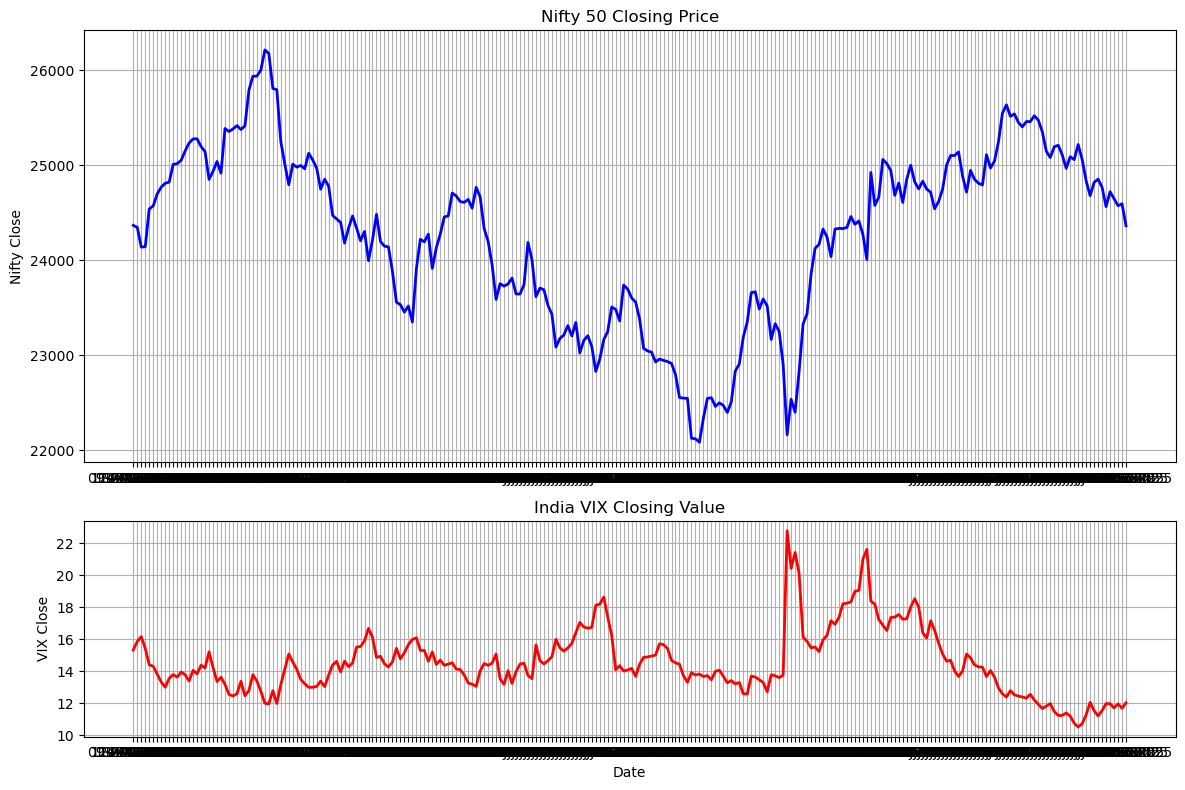

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set up the figure and axes using gridspec
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # Upper Nifty bigger, lower VIX smaller

# Nifty 50 closing price plot (upper)
ax1 = plt.subplot(gs[0])
ax1.plot(nifty_data['Date'], nifty_data['Close'], color='blue', linewidth=2)
ax1.set_title('Nifty 50 Closing Price')
ax1.set_ylabel('Nifty Close')
ax1.grid(True)

# India VIX closing value plot (lower)
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(indiavix_data['Date'], indiavix_data['Close'], color='red', linewidth=2)
ax2.set_title('India VIX Closing Value')
ax2.set_ylabel('VIX Close')
ax2.set_xlabel('Date')
ax2.grid(True)

plt.tight_layout()
plt.show()


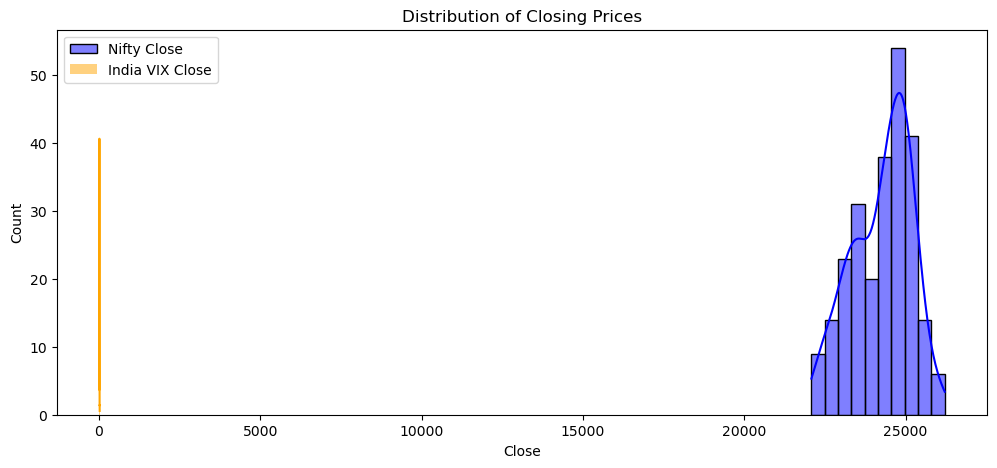

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(nifty_data['Close'], kde=True, color='blue', label='Nifty Close')
sns.histplot(indiavix_data['Close'], kde=True, color='orange', label='India VIX Close')
plt.title('Distribution of Closing Prices')
plt.legend()
plt.show()


Correlation between Nifty Close and India VIX: -0.3557


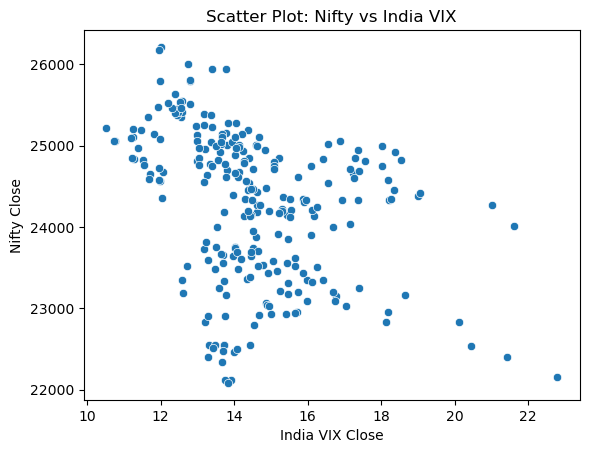

In [19]:
merged = pd.merge(nifty_data, indiavix_data, on='Date', suffixes=('_nifty', '_vix'))
correlation = merged['Close_nifty'].corr(merged['Close_vix'])
print(f"Correlation between Nifty Close and India VIX: {correlation:.4f}")

sns.scatterplot(x=merged['Close_vix'], y=merged['Close_nifty'])
plt.title('Scatter Plot: Nifty vs India VIX')
plt.xlabel('India VIX Close')
plt.ylabel('Nifty Close')
plt.show()


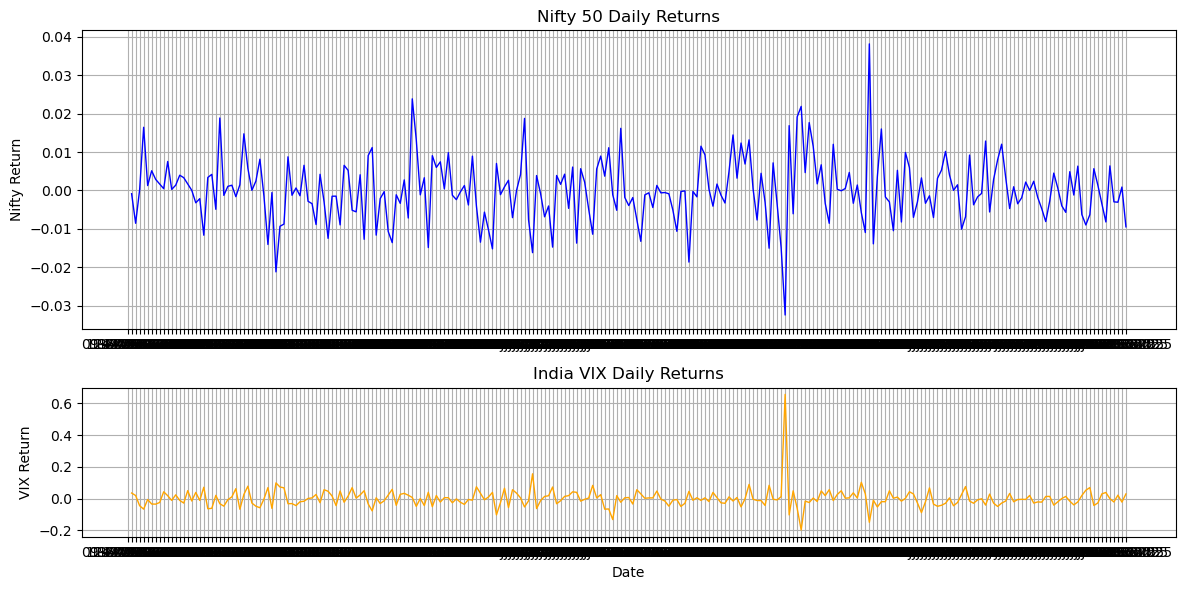

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Calculate daily returns
nifty_returns = nifty_data['Close'].pct_change()
vix_returns = indiavix_data['Close'].pct_change()

# Set up the figure and axes using gridspec
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

# Nifty daily returns (upper)
ax1 = plt.subplot(gs[0])
ax1.plot(nifty_data['Date'], nifty_returns, color='blue', linewidth=1)
ax1.set_title('Nifty 50 Daily Returns')
ax1.set_ylabel('Nifty Return')
ax1.grid(True)

# India VIX daily returns (lower)
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(indiavix_data['Date'], vix_returns, color='orange', linewidth=1)
ax2.set_title('India VIX Daily Returns')
ax2.set_ylabel('VIX Return')
ax2.set_xlabel('Date')
ax2.grid(True)

plt.tight_layout()
plt.show()


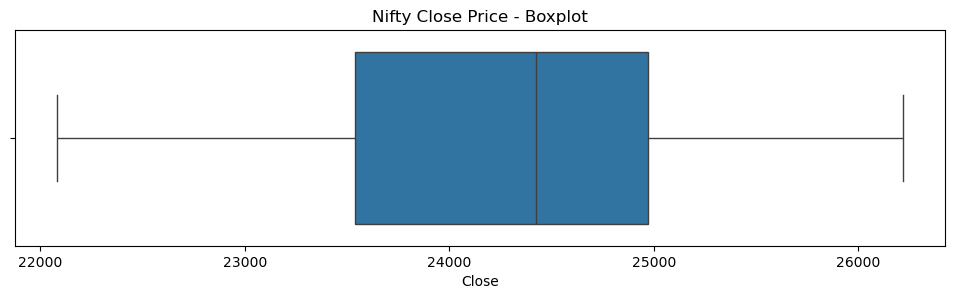

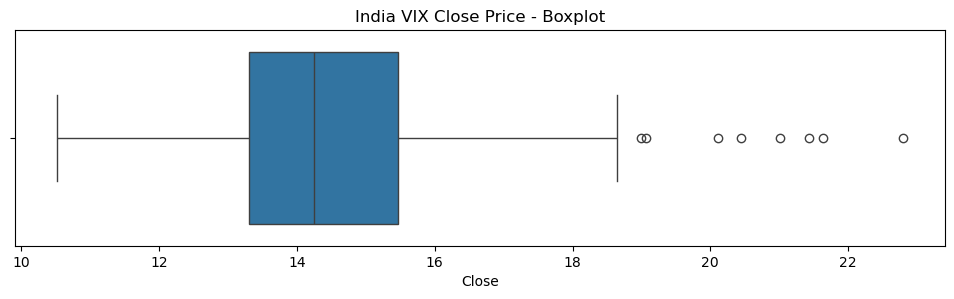

In [21]:
plt.figure(figsize=(12,2.8))
sns.boxplot(x=nifty_data['Close'])
plt.title('Nifty Close Price - Boxplot')
plt.show()

plt.figure(figsize=(12,2.8))
sns.boxplot(x=indiavix_data['Close'])
plt.title('India VIX Close Price - Boxplot')
plt.show()


In [22]:

# Rename for clarity
nifty_data.rename(columns={'Close': 'NIFTY_Close'}, inplace=True)
indiavix_data.rename(columns={'Close': 'INDIAVIX'}, inplace=True)

# Convert to datetime
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
indiavix_data['Date'] = pd.to_datetime(indiavix_data['Date'])

# Merge datasets
df = pd.merge(
    nifty_data[['Date', 'NIFTY_Close']],
    indiavix_data[['Date', 'INDIAVIX']],
    on='Date',
    how='inner'
)
df.sort_values('Date', inplace=True)


/tmp/ipykernel_559444/1060938945.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
/tmp/ipykernel_559444/1060938945.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  indiavix_data['Date'] = pd.to_datetime(indiavix_data['Date'])


In [23]:
# ========================
# 3. Feature Engineering
# ========================
df['NIFTY_Return'] = df['NIFTY_Close'].pct_change()
df['VIX_Change'] = df['INDIAVIX'].pct_change()

# Lag features
for lag in range(1, 4):
    df[f'NIFTY_Return_lag{lag}'] = df['NIFTY_Return'].shift(lag)
    df[f'VIX_Change_lag{lag}'] = df['VIX_Change'].shift(lag)

df.dropna(inplace=True)

# Features to use
features = ['NIFTY_Close', 'INDIAVIX', 'NIFTY_Return', 'VIX_Change'] + \
           [f'NIFTY_Return_lag{lag}' for lag in range(1, 4)] + \
           [f'VIX_Change_lag{lag}' for lag in range(1, 4)]


In [24]:
# ========================
# 4. Prepare Data for LSTM — Predicting Returns
# ========================
data = df[features].values
target = df['NIFTY_Return'].values  # Next-day return prediction

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(data_scaled, target, SEQ_LENGTH)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [25]:
# ========================
# 5. Build & Train Model
# ========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])),
    Dropout(0.1),
    LSTM(32),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)  # Predicting daily return
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50


2025-09-10 12:52:17.046747: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/rsg-ubu/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0013 - mae: 0.0248 - val_loss: 1.7952e-04 - val_mae: 0.0120
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.6511e-04 - mae: 0.0128 - val_loss: 4.7271e-05 - val_mae: 0.0054
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8961e-04 - mae: 0.0111 - val_loss: 4.0155e-05 - val_mae: 0.0053
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8077e-04 - mae: 0.0109 - val_loss: 4.4057e-05 - val_mae: 0.0056
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.4999e-04 - mae: 0.0093 - val_loss: 3.8004e-05 - val_mae: 0.0049
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6374e-04 - mae: 0.0094 - val_loss: 2.9867e-05 - val_mae: 0.0045
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5115e-04 - mae: 0.0096 - val_loss: 4.0384e-05 - val_mae: 0.0050
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4188e-04 - mae: 0.0090 - val_loss: 3.2117e-05 - val_mae: 0.0044
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━

In [26]:
# ========================
# 6. Predict Returns & Reconstruct Prices
# ========================
y_pred_return = model.predict(X_test).flatten()

# Reconstruct predicted close prices
predicted_close = []
actual_close_test = df['NIFTY_Close'].iloc[split+SEQ_LENGTH:].values

prev_close = df['NIFTY_Close'].iloc[split+SEQ_LENGTH-1]
for ret in y_pred_return:
    next_pred = prev_close * (1 + ret)
    predicted_close.append(next_pred)
    prev_close = actual_close_test[len(predicted_close)-1]  # use actual for rolling

predicted_close = np.array(predicted_close)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [27]:
# ========================
# 7. Evaluation Metrics
# ========================
mae = mean_absolute_error(actual_close_test, predicted_close)
rmse = np.sqrt(mean_squared_error(actual_close_test, predicted_close))
r2 = r2_score(actual_close_test, predicted_close)
mape = np.mean(np.abs((actual_close_test - predicted_close) / actual_close_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


MAE: 108.14
RMSE: 133.42
R^2 Score: 0.8175
MAPE: 0.43%


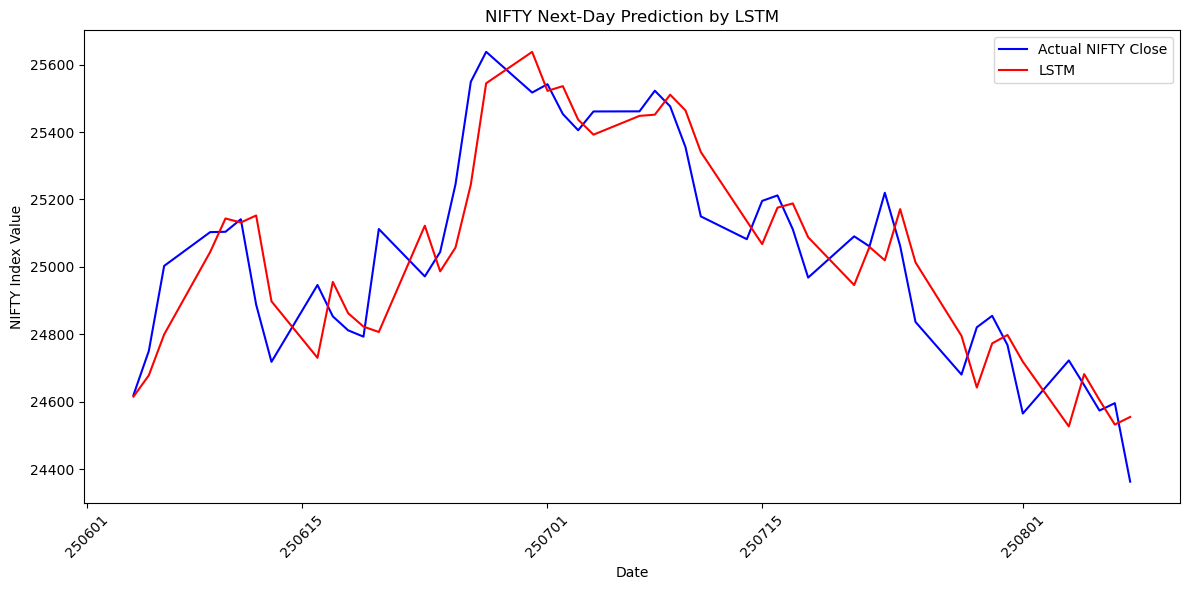

In [28]:
# ========================
# 8. Plot Predictions with Date on X-axis
# ========================
plt.figure(figsize=(12,6))
dates_test = df['Date'].iloc[split+SEQ_LENGTH:]
plt.plot(dates_test, actual_close_test, label="Actual NIFTY Close", color='blue')
plt.plot(dates_test, predicted_close, label="LSTM", color='red')

plt.title("NIFTY Next-Day Prediction by LSTM")
plt.xlabel("Date")
plt.ylabel("NIFTY Index Value")

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [29]:

# ========================
# 2. Transformer for Time Series
# ========================
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

train_ds = TensorDataset(X_t[:split], y_t[:split])
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.input_fc = nn.Linear(feature_size, 64)
        enc_layer = nn.TransformerEncoderLayer(d_model=64, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(enc_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(64, 1)
    def forward(self, x):
        x = self.input_fc(x)
        x = x.permute(1,0,2)
        x = self.transformer(x)
        return self.fc_out(x[-1])


In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_t = TimeSeriesTransformer(feature_size=X.shape[2]).to(device)
opt = torch.optim.Adam(model_t.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(20):
    model_t.train()
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        loss = loss_fn(model_t(xb), yb)
        opt.zero_grad()
        loss.backward()
        opt.step()

model_t.eval()
with torch.no_grad():
    y_pred_torch = model_t(X_t[split:].to(device)).cpu().numpy().flatten()

# Map Transformer returns → predicted prices
predicted_close_t = []
prev_close = df['NIFTY_Close'].iloc[split+SEQ_LENGTH-1]
for ret in y_pred_torch:
    next_pred = prev_close * (1 + ret)
    predicted_close_t.append(next_pred)
    prev_close = actual_close_test[len(predicted_close_t)-1]
predicted_close_t = np.array(predicted_close_t)


/home/rsg-ubu/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [31]:
# ========================
# 3. N-BEATS Model 
# ========================
!pip install darts[u] --quiet
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler

# Force regular business-day index and forward fill
df_resampled = df.set_index("Date").resample("B").ffill().reset_index()

# Create TimeSeries starting at same test point as LSTM
series = TimeSeries.from_dataframe(
    df_resampled.iloc[SEQ_LENGTH:], time_col="Date", value_cols="NIFTY_Close"
)
# Scale
scaler_darts = Scaler()
series_scaled = scaler_darts.fit_transform(series)

# Match train/test split dates exactly with LSTM split
train_series = series_scaled[:split]
test_series  = series_scaled[split:]

model_nbeats = NBEATSModel(
    input_chunk_length=SEQ_LENGTH,
    output_chunk_length=1,
    n_epochs=50,
    batch_size=32,
    random_state=42,
)


In [32]:

model_nbeats.fit(train_series, verbose=False)
pred_series   = model_nbeats.predict(len(test_series))
pred_nbeats   = scaler_darts.inverse_transform(pred_series).values().flatten()

# Clean NaN/infs
pred_nbeats = np.where(np.isnan(pred_nbeats) | np.isinf(pred_nbeats), 0, pred_nbeats)

# Align lengths with actual_close_test if needed
min_len = min(len(actual_close_test), len(pred_nbeats))
pred_nbeats = pred_nbeats[:min_len]
actual_close_test_aligned = actual_close_test[:min_len]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [33]:

# ========================
# 4. Compare All Models
# ========================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, name):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "MAPE%": np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    }

results = [
    evaluate_model(actual_close_test, predicted_close, "LSTM"),
    evaluate_model(actual_close_test, predicted_close_t, "Transformer"),
    evaluate_model(actual_close_test_aligned, pred_nbeats, "N-BEATS")
]

df_results = pd.DataFrame(results)
print(df_results)


         Model         MAE        RMSE        R2     MAPE%
0         LSTM  108.141959  133.423168  0.817461  0.432121
1  Transformer  180.923338  211.217648  0.542540  0.723315
2      N-BEATS  810.376127  967.615543 -8.600596  3.251541


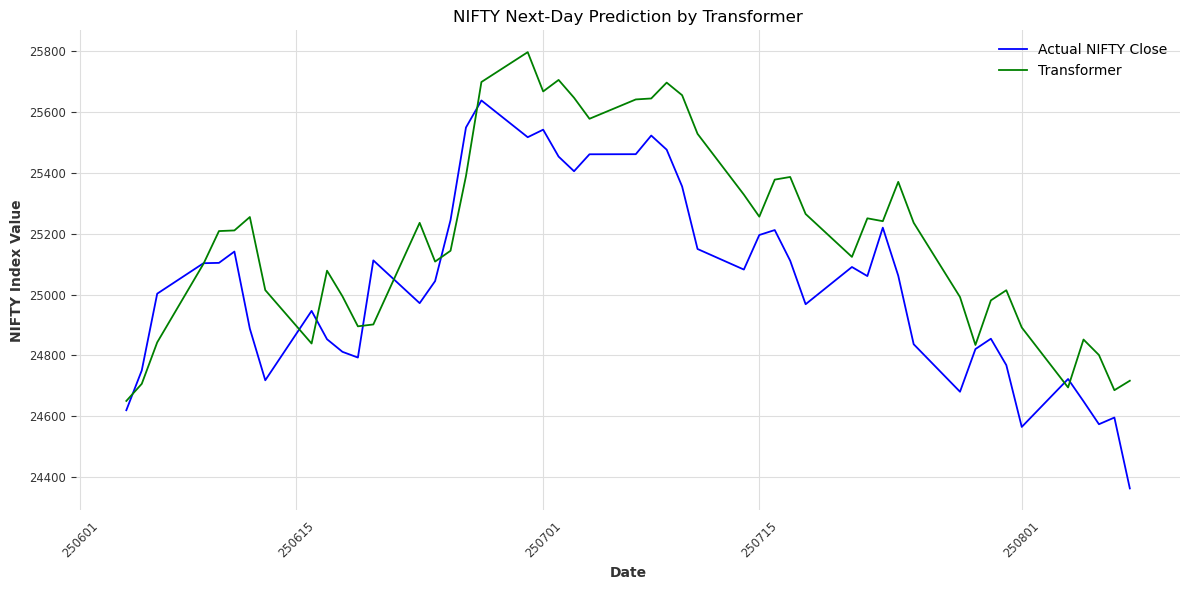

In [34]:
# ========================
# 8. Plot Predictions with Date on X-axis
# ========================
plt.figure(figsize=(12,6))
dates_test = df['Date'].iloc[split+SEQ_LENGTH:]
plt.plot(dates_test, actual_close_test, label="Actual NIFTY Close", color='blue')
#plt.plot(dates_test, predicted_close, label="Predicted NIFTY Close (Return-based)")
plt.plot(dates_test, predicted_close_t[:min_len], label="Transformer", color='green')

plt.title("NIFTY Next-Day Prediction by Transformer")
plt.xlabel("Date")
plt.ylabel("NIFTY Index Value")

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


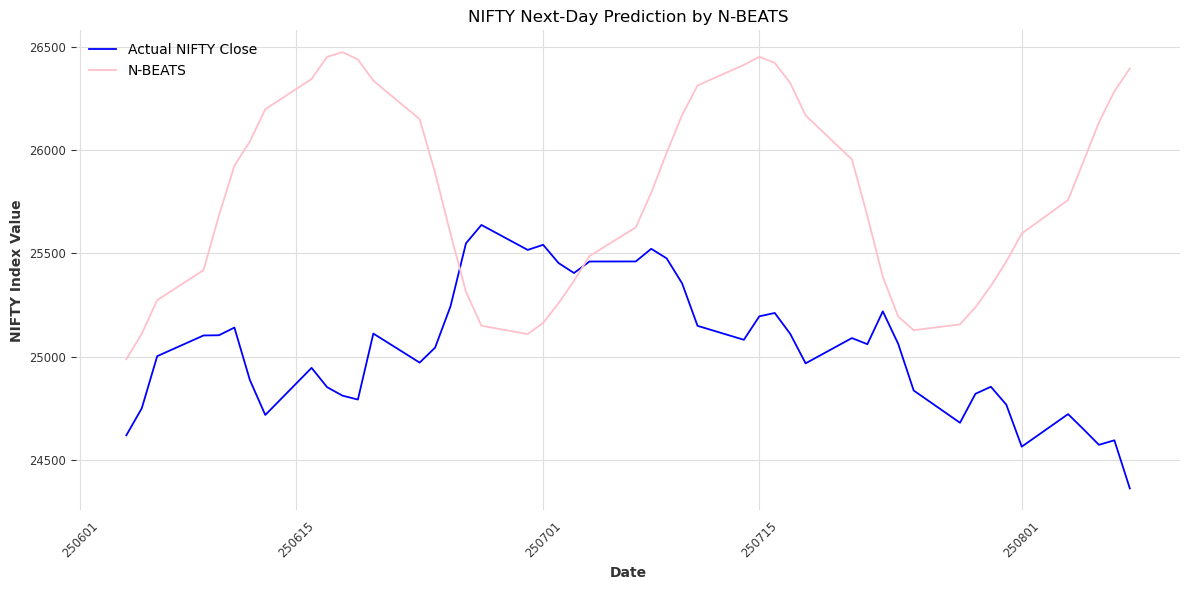

In [35]:
# ========================
# 8. Plot Predictions with Date on X-axis
# ========================
plt.figure(figsize=(12,6))
dates_test = df['Date'].iloc[split+SEQ_LENGTH:]
plt.plot(dates_test, actual_close_test, label="Actual NIFTY Close", color="blue")
#plt.plot(dates_test, predicted_close, label="Predicted NIFTY Close (Return-based)")
plt.plot(dates_test, pred_nbeats, label="N-BEATS", color="pink")

plt.title("NIFTY Next-Day Prediction by N-BEATS")
plt.xlabel("Date")
plt.ylabel("NIFTY Index Value")

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y%m%d'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


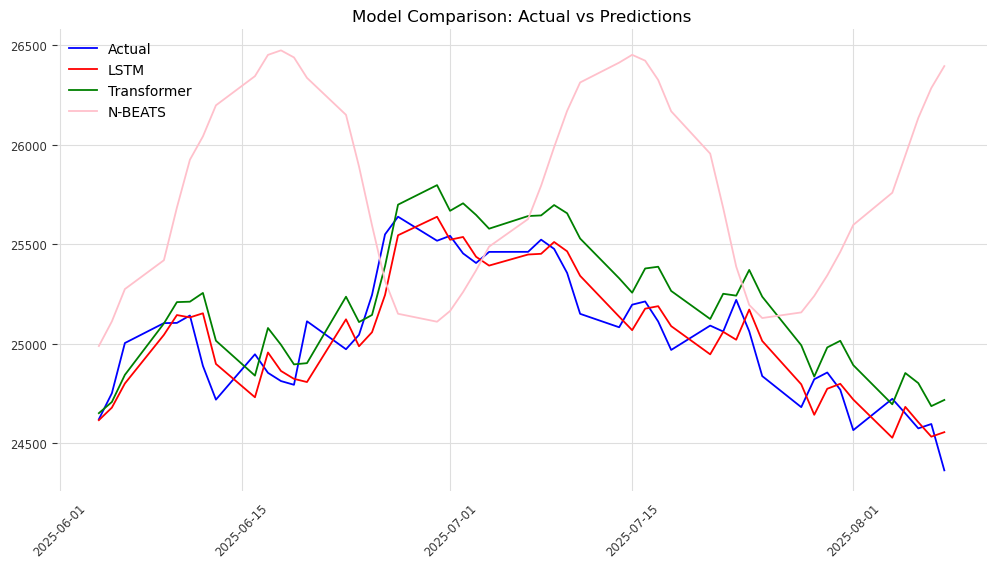

In [36]:
# ========================
# 5. Plot Comparison
# ========================
plt.figure(figsize=(12,6))
dates_test = df['Date'].iloc[split+SEQ_LENGTH:split+SEQ_LENGTH+min_len]

plt.plot(dates_test, actual_close_test_aligned, label="Actual", color="blue")
plt.plot(dates_test, predicted_close[:min_len], label="LSTM", color="red")
plt.plot(dates_test, predicted_close_t[:min_len], label="Transformer", color="green")
plt.plot(dates_test, pred_nbeats, label="N-BEATS", color="pink")

plt.legend()
plt.title("Model Comparison: Actual vs Predictions")
plt.xticks(rotation=45)
plt.show()
